# OVERVIEW
The goal of this project is to determine a pattern, if any, that exists among the restaurants that have **repeated** health violations. Would this pattern occur across a specific geolocation? Utilizing the provided datasets, I was able to find a quantifiable, positively correlated connection between variables `% of families below poverty line`, `% security income`, and `% repeated violations`. Particularly, there is a strong correlation between `% of families below poverty line` & `% security income`.

# NAME & ID
Name: Cyndia Zhou

ID: A15094887

# RESEARCH QUESTION
Is there a correlation between repeat health violations and the demographic information for their respective zip codes? 

# BACKGROUND & PRIOR WORK

According to Tom Knapp from "Lancaster Online", restaurants, even repeat violators, are closed for failing state inspections. This is a terrifying thought! However, according to Shannon Powers, the deputy communications for the Pennsylvania Department of Agriculture, says that "The department only has legal authority to shut down a restaurant when there is an imminent threat to human health". Additionally, the violations are recorded at the time of inspection but are often corrected before the inspector leaves the facility. This is a terrifying sentiment for restaurant goers, but is there another factor that can affect these repeat violations? For example, cjonline.com reports that repeat health code violations can lead to fines, which seems to imply that "poorer" locations may struggle more with preventing repeat health violations.

Sources: "https://lancasteronline.com/news/local/restaurants-even-repeat-violators-are-rarely-closed-for-failing-state-inspections-why-we-the-people/article_5e392808-01e8-11e8-b0fe-6b15dfa1e6ff.html", "https://www.cjonline.com/article/20120617/NEWS/306179937"

# HYPOTHESIS
The alternative hypothesis to the proposed research question is that there will be a strong, positive correlation between repeat health violations in restaurants and their zip codes, dude to their respective demographic information. The null hypothesis is that there is no correlation between these two variables.

# DATASET(S)
From the datasets provided to us on Canvas, I used `inspections.csv`,`restaurants.csv`,`violations.csv`, and `zipcodes.csv`.

In [ ]:
df_inspect = pd.read_csv('data/inspections.csv')
df_rest = pd.read_csv('data/restaurants.csv')
df_viol = pd.read_csv('data/violations.csv')
df_zippy = pd.read_csv('data/zipcodes.csv')

# SETUP
<font color=#949494>

### packages & relevant data
</font>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# DATA CLEANING
<font color=#949494>

### part one: narrowing down which restaurants have repeat health violations
</font>

I decided to cross-reference data from `df_rest` and `df_viol` by first merging the two dataframes together. Then, I cleaned up the data by dropping all NaN and duplicate values.

In [2]:
df_viol = df_viol[['hsisid','violationtype']]
df_rest = df_rest[['hsisid','name','postalcode']]
df_restInViol = pd.merge(df_rest, df_viol,on='hsisid')

In [3]:
df_restInViol = df_restInViol.dropna()

In [4]:
df_restInViol.drop_duplicates(subset ='hsisid', keep ='first', inplace = True)


Because we are focusing on **repeated** health violations, I next dropped all of the rows that did not contain a repeated violation type & reset the index.

In [5]:
df_restInViol = df_restInViol[df_restInViol['violationtype'] == 'R']

In [6]:
df_restInViol = df_restInViol.reset_index(drop=True)

Noticing that certain zip codes have an extension, I then standardized it to show only the first five digits.

In [7]:
def standardize_zippy(string):
    return string[:5]

In [8]:
df_restInViol['postalcode'] = df_restInViol['postalcode'].apply(standardize_zippy)


After, I renamed each column for further clarity.

In [9]:
df_restInViol = df_restInViol[['name','postalcode','violationtype']]


Let's look through the `postalcode` column to see which zip codes made the repeat-health-violations list.

In [10]:
df_restInViol['postalcode'].unique()

array(['27616', '27597', '27609', '27513', '27605', '27526', '27613',
       '27502', '27612', '28277', '27607', '27529', '27511', '27571',
       '27610', '27601', '27587', '27604', '27615', '27579', '27560',
       '27603', '27518', '27617', '27614', '27608', '27606', '27695',
       '27519', '27623', '27545', '27539', '27602', '27512', '27540'],
      dtype=object)

# DATA ANALYSIS

<font color=#949494>

### step one: getting a sense of how many restaurants have repeat health violations
</font>

To better visualize the frequency of restaurants with repeat health violations, I started by graphing a histogram.

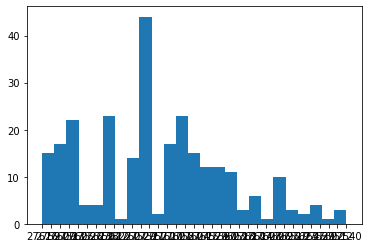

In [11]:
restViolZip = plt.hist(df_restInViol['postalcode'],bins=25);
restViolZip = plt.gcf()


The first thing you may notice is that this graph illustrates an extreme number of restaurants at once specific location. Let's look into why this is – should we be warning the CDC?

In [12]:
df_restInViol['postalcode'].mode()

0    27511
dtype: object

# DATA ANALYSIS

<font color=#949494>

### step two: investigating zip code 27511
</font>

It's odd that one specific location has an abnormally high amount of health code violations – almost *double* the second-highest health violation rate! Let's create a new dataframe with this data to further investigate.

In [13]:
df_violEpicenter = df_restInViol[df_restInViol['postalcode'] == '27511']
df_violEpicenter.reset_index(drop=True)

,name,postalcode,violationtype
0,Biryani House,27511,R
1,New Super Grocery &amp; Fresh Halal Meat,27511,R
2,Little Caesars #1509,27511,R
3,Dickey`s Barbecue Pit #127,27511,R
4,El Cuscatleco Restaurant,27511,R
5,Moe`s Southwest Grill #683,27511,R
6,TOM YUM THAI,27511,R
7,Little Tokyo,27511,R
8,"Lowes Foods # 162 Meat, Seafood, and Sausages",27511,R
9,Remington Grill,27511,R


It looks like a total of 23 restaurants have repeated violations – but is this number significant? To determine this, we need to look at the total amount of restaurants in the 27511 area.

In [119]:
df_inspectZip = df_inspect[df_inspect['postalcode'] == '27511']
df_inspectZip = df_inspectZip[['name','postalcode','facilitytype']]

In [120]:
df_inspectZip = df_inspectZip[df_inspectZip['facilitytype'] == 'Restaurant']
df_inspectZip.reset_index(drop=True)

,name,postalcode,facilitytype
0,Jordan Oaks,27511,Restaurant
1,Taqueria Rancho Grande,27511,Restaurant
2,SUBWAY #36806,27511,Restaurant
3,STAMMTISCH CAFE,27511,Restaurant
4,PAPA JOHN'S,27511,Restaurant
...,...,...,...
643,STAMMTISCH CAFE,27511,Restaurant
644,EAST GARDEN,27511,Restaurant
645,HIMALAYAN NEPALI CUISINE,27511,Restaurant
646,WALTONWOOD AT CARY DINING,27511,Restaurant


In [121]:
repeatViolRate = (23/648)*100
repeatViolRate

3.5493827160493825

Ah ha! Even though the number of restaurants with repeated violations in this area is greater than in others, the rate is only 3.55% with respect to the rest of the restaurants in the 275211. Whew! Glad we put this in perspective.

# DATA ANALYSIS

<font color=#949494>

### step three: what about the other restaurants?
</font>

Let's cross-reference `df_zippy` with `df_restInViol`, the dataset we created in the data cleaning portion, to see a) any overlapping zip codes and b) their respective restaurants' repeated health violation rates.

In [123]:
df_restInViol.columns = ['name','zip','violationtype']

Because `df_zippy`'s 'zip' column values are `int` types, while `df_restInViol`'s 'zip' column are `string` types, we must convert `df_zippy`'s column values into `string` before we can merge the two datasets. Then, we need drop the duplicates and reset the index.

In [22]:
df_restInViol.dtypes

name             object
zip              object
violationtype    object
dtype: object

In [21]:
df_zippy['zip'] = df_zippy['zip'].astype(str)

In [23]:
df_zipInViol = pd.merge(df_zippy, df_restInViol, on='zip')

In [24]:
df_zipInViol.drop_duplicates(subset ='zip', keep ='first', inplace = True)

In [25]:
df_zipInViol = df_zipInViol.reset_index(drop=True)

# DATA ANALYSIS

<font color=#949494>

### step four: time to create our health violation rates
</font>

Here, I took all 29 postal codes provided in `df_zipInViol`'s 'zip' column to calcuate the ratio of restaurants with repeat health violations to the total number of inspected restaurants within that given zip code.

<font color="#bfbfbf">
    
#### postal code 27502
</font>

In [26]:
df_inspect502 = df_inspect[df_inspect['postalcode'] == '27502']
df_inspect502 = df_inspect502[['name','postalcode','facilitytype']]
df_inspect502 = df_inspect502[df_inspect502['facilitytype'] == 'Restaurant']
df_inspect502.count()


name            352
postalcode      352
facilitytype    352
dtype: int64

In [27]:
df_restViol502 = df_restInViol[df_restInViol['zip'] == '27502']
df_restViol502.count()


name             4
zip              4
violationtype    4
dtype: int64

In [28]:
df_rate502 = (4/352)*100
df_rate502

1.1363636363636365

<font color="#bfbfbf">
    
#### postal code 27511
</font>

In [29]:
df_rate511 = repeatViolRate
df_rate511

3.5493827160493825

<font color="#bfbfbf">
    
#### postal code 27513
</font>

>If you remember, I already calculated this rate at the beginning of the analysis.

In [30]:
df_inspect513 = df_inspect[df_inspect['postalcode'] == '27513']
df_inspect513 = df_inspect513[['name','postalcode','facilitytype']]
df_inspect513 = df_inspect513[df_inspect513['facilitytype'] == 'Restaurant']
df_inspect513.count()


name            430
postalcode      430
facilitytype    430
dtype: int64

In [31]:
df_restViol513 = df_restInViol[df_restInViol['zip'] == '27513']
df_restViol513.count()


name             16
zip              16
violationtype    16
dtype: int64

In [32]:
df_rate513 = (16/430)*100
df_rate513

3.7209302325581395

<font color="#bfbfbf">
    
#### postal code 27518
</font>

In [33]:
df_inspect518 = df_inspect[df_inspect['postalcode'] == '27518']
df_inspect518 = df_inspect518[['name','postalcode','facilitytype']]
df_inspect518 = df_inspect518[df_inspect518['facilitytype'] == 'Restaurant']
df_inspect518.count()


name            266
postalcode      266
facilitytype    266
dtype: int64

In [34]:
df_restViol518 = df_restInViol[df_restInViol['zip'] == '27518']
df_restViol518.count()


name             1
zip              1
violationtype    1
dtype: int64

In [35]:
df_rate518 = (1/266)*100
df_rate518

0.37593984962406013

<font color="#bfbfbf">
    
#### postal code 27519
</font>

In [36]:
df_inspect519 = df_inspect[df_inspect['postalcode'] == '27519']
df_inspect519 = df_inspect519[['name','postalcode','facilitytype']]
df_inspect519 = df_inspect519[df_inspect519['facilitytype'] == 'Restaurant']
df_inspect519.count()


name            202
postalcode      202
facilitytype    202
dtype: int64

In [37]:
df_restViol519 = df_restInViol[df_restInViol['zip'] == '27519']
df_restViol519.count()


name             3
zip              3
violationtype    3
dtype: int64

In [38]:
df_rate519 = (3/202)*100
df_rate519

1.4851485148514851

<font color="#bfbfbf">
    
#### postal code 27526
</font>

In [39]:
df_inspect526 = df_inspect[df_inspect['postalcode'] == '27526']
df_inspect526 = df_inspect526[['name','postalcode','facilitytype']]
df_inspect526 = df_inspect526[df_inspect526['facilitytype'] == 'Restaurant']
df_inspect526.count()


name            368
postalcode      368
facilitytype    368
dtype: int64

In [40]:
df_restViol526 = df_restInViol[df_restInViol['zip'] == '27526']
df_restViol526.count()


name             4
zip              4
violationtype    4
dtype: int64

In [41]:
df_rate526 = (4/368)*100
df_rate526

1.0869565217391304

<font color="#bfbfbf">
    
#### postal code 27529
</font>

In [42]:
df_inspect529 = df_inspect[df_inspect['postalcode'] == '27529']
df_inspect529 = df_inspect529[['name','postalcode','facilitytype']]
df_inspect529 = df_inspect529[df_inspect529['facilitytype'] == 'Restaurant']
df_inspect529.count()


name            287
postalcode      287
facilitytype    287
dtype: int64

In [43]:
df_restViol529 = df_restInViol[df_restInViol['zip'] == '27529']
df_restViol529.count()


name             21
zip              21
violationtype    21
dtype: int64

In [44]:
df_rate529 = (21/287)*100
df_rate529

7.317073170731707

<font color="#bfbfbf">
    
#### postal code 27539
</font>

In [45]:
df_inspect539 = df_inspect[df_inspect['postalcode'] == '27539']
df_inspect539 = df_inspect539[['name','postalcode','facilitytype']]
df_inspect539 = df_inspect539[df_inspect539['facilitytype'] == 'Restaurant']
df_inspect539.count()


name            54
postalcode      54
facilitytype    54
dtype: int64

In [46]:
df_restViol539 = df_restInViol[df_restInViol['zip'] == '27539']
df_restViol539.count()


name             1
zip              1
violationtype    1
dtype: int64

In [47]:
df_rate539 = (1/54)*100
df_rate539

1.8518518518518516

<font color="#bfbfbf">
    
#### postal code 27540
</font>

In [48]:
df_inspect540 = df_inspect[df_inspect['postalcode'] == '27540']
df_inspect540 = df_inspect540[['name','postalcode','facilitytype']]
df_inspect540 = df_inspect540[df_inspect540['facilitytype'] == 'Restaurant']
df_inspect540.count()


name            258
postalcode      258
facilitytype    258
dtype: int64

In [49]:
df_restViol540 = df_restInViol[df_restInViol['zip'] == '27540']
df_restViol540.count()


name             2
zip              2
violationtype    2
dtype: int64

In [50]:
df_rate540 = (2/258)*100
df_rate540

0.7751937984496124

<font color="#bfbfbf">
    
#### postal code 27545
</font>

In [51]:
df_inspect545 = df_inspect[df_inspect['postalcode'] == '27545']
df_inspect545 = df_inspect545[['name','postalcode','facilitytype']]
df_inspect545 = df_inspect545[df_inspect545['facilitytype'] == 'Restaurant']
df_inspect545.count()


name            247
postalcode      247
facilitytype    247
dtype: int64

In [52]:
df_restViol545 = df_restInViol[df_restInViol['zip'] == '27545']
df_restViol545.count()


name             3
zip              3
violationtype    3
dtype: int64

In [53]:
df_rate545 = (3/247)*100
df_rate545

1.214574898785425

<font color="#bfbfbf">
    
#### postal code 27560
</font>

In [54]:
df_inspect560 = df_inspect[df_inspect['postalcode'] == '27560']
df_inspect560 = df_inspect560[['name','postalcode','facilitytype']]
df_inspect560 = df_inspect560[df_inspect560['facilitytype'] == 'Restaurant']
df_inspect560.count()


name            513
postalcode      513
facilitytype    513
dtype: int64

In [55]:
df_restViol560 = df_restInViol[df_restInViol['zip'] == '27560']
df_restViol560.count()


name             12
zip              12
violationtype    12
dtype: int64

In [56]:
df_rate560 = (12/513)*100
df_rate560

2.3391812865497075

<font color="#bfbfbf">
    
#### postal code 27571
</font>

In [57]:
df_inspect571 = df_inspect[df_inspect['postalcode'] == '27571']
df_inspect571 = df_inspect571[['name','postalcode','facilitytype']]
df_inspect571 = df_inspect571[df_inspect571['facilitytype'] == 'Restaurant']
df_inspect571.count()


name            48
postalcode      48
facilitytype    48
dtype: int64

In [58]:
df_restViol571 = df_restInViol[df_restInViol['zip'] == '27571']
df_restViol571.count()


name             2
zip              2
violationtype    2
dtype: int64

In [59]:
df_rate571 = (2/48)*100
df_rate571

4.166666666666666

<font color="#bfbfbf">
    
#### postal code 27587
</font>

In [60]:
df_inspect587 = df_inspect[df_inspect['postalcode'] == '27587']
df_inspect587 = df_inspect587[['name','postalcode','facilitytype']]
df_inspect587 = df_inspect587[df_inspect587['facilitytype'] == 'Restaurant']
df_inspect587.count()


name            479
postalcode      479
facilitytype    479
dtype: int64

In [61]:
df_restViol587 = df_restInViol[df_restInViol['zip'] == '27587']
df_restViol587.count()


name             18
zip              18
violationtype    18
dtype: int64

In [62]:
df_rate587 = (18/479)*100
df_rate587

3.7578288100208765

<font color="#bfbfbf">
    
#### postal code 27597
</font>

In [63]:
df_inspect597 = df_inspect[df_inspect['postalcode'] == '27597']
df_inspect597 = df_inspect597[['name','postalcode','facilitytype']]
df_inspect597 = df_inspect597[df_inspect597['facilitytype'] == 'Restaurant']
df_inspect597.count()


name            159
postalcode      159
facilitytype    159
dtype: int64

In [64]:
df_restViol597 = df_restInViol[df_restInViol['zip'] == '27597']
df_restViol597.count()


name             3
zip              3
violationtype    3
dtype: int64

In [65]:
df_rate597 = (3/159)*100
df_rate597

1.8867924528301887

<font color="#bfbfbf">
    
#### postal code 27601
</font>

In [66]:
df_inspect601 = df_inspect[df_inspect['postalcode'] == '27601']
df_inspect601 = df_inspect601[['name','postalcode','facilitytype']]
df_inspect601 = df_inspect601[df_inspect601['facilitytype'] == 'Restaurant']
df_inspect601.count()


name            409
postalcode      409
facilitytype    409
dtype: int64

In [67]:
df_restViol601 = df_restInViol[df_restInViol['zip'] == '27601']
df_restViol601.count()


name             5
zip              5
violationtype    5
dtype: int64

In [68]:
df_rate601 = (5/409)*100
df_rate601

1.2224938875305624

<font color="#bfbfbf">
    
#### postal code 27603
</font>

In [69]:
df_inspect603 = df_inspect[df_inspect['postalcode'] == '27603']
df_inspect603 = df_inspect603[['name','postalcode','facilitytype']]
df_inspect603 = df_inspect603[df_inspect603['facilitytype'] == 'Restaurant']
df_inspect603.count()


name            400
postalcode      400
facilitytype    400
dtype: int64

In [70]:
df_restViol603 = df_restInViol[df_restInViol['zip'] == '27603']
df_restViol603.count()


name             11
zip              11
violationtype    11
dtype: int64

In [71]:
df_rate603 = (11/400)*100
df_rate603

2.75

<font color="#bfbfbf">
    
#### postal code 27604
</font>

In [72]:
df_inspect604 = df_inspect[df_inspect['postalcode'] == '27604']
df_inspect604 = df_inspect604[['name','postalcode','facilitytype']]
df_inspect604 = df_inspect604[df_inspect604['facilitytype'] == 'Restaurant']
df_inspect604.count()


name            347
postalcode      347
facilitytype    347
dtype: int64

In [73]:
df_restViol604 = df_restInViol[df_restInViol['zip'] == '27604']
df_restViol604.count()


name             15
zip              15
violationtype    15
dtype: int64

In [74]:
df_rate604 = (15/375)*100
df_rate604

4.0

<font color="#bfbfbf">
    
#### postal code 27605
</font>

In [75]:
df_inspect605 = df_inspect[df_inspect['postalcode'] == '27605']
df_inspect605 = df_inspect605[['name','postalcode','facilitytype']]
df_inspect605 = df_inspect605[df_inspect605['facilitytype'] == 'Restaurant']
df_inspect605.count()


name            160
postalcode      160
facilitytype    160
dtype: int64

In [76]:
df_restViol605 = df_restInViol[df_restInViol['zip'] == '27605']
df_restViol605.count()


name             6
zip              6
violationtype    6
dtype: int64

In [77]:
df_rate605 = (6/160)*100
df_rate605

3.75

<font color="#bfbfbf">
    
#### postal code 27606
</font>

In [78]:
df_inspect606 = df_inspect[df_inspect['postalcode'] == '27606']
df_inspect606 = df_inspect606[['name','postalcode','facilitytype']]
df_inspect606 = df_inspect606[df_inspect606['facilitytype'] == 'Restaurant']
df_inspect606.count()


name            236
postalcode      236
facilitytype    236
dtype: int64

In [79]:
df_restViol606 = df_restInViol[df_restInViol['zip'] == '27606']
df_restViol606.count()


name             4
zip              4
violationtype    4
dtype: int64

In [80]:
df_rate606 = (4/236)*100
df_rate606

1.694915254237288

<font color="#bfbfbf">
    
#### postal code 27607
</font>

In [81]:
df_inspect607 = df_inspect[df_inspect['postalcode'] == '27607']
df_inspect607 = df_inspect607[['name','postalcode','facilitytype']]
df_inspect607 = df_inspect607[df_inspect607['facilitytype'] == 'Restaurant']
df_inspect607.count()


name            356
postalcode      356
facilitytype    356
dtype: int64

In [82]:
df_restViol607 = df_restInViol[df_restInViol['zip'] == '27607']
df_restViol607.count()


name             14
zip              14
violationtype    14
dtype: int64

In [83]:
df_rate607 = (14/356)*100
df_rate607

3.932584269662921

<font color="#bfbfbf">
    
#### postal code 27608
</font>

In [84]:
df_inspect608 = df_inspect[df_inspect['postalcode'] == '27608']
df_inspect608 = df_inspect608[['name','postalcode','facilitytype']]
df_inspect608 = df_inspect608[df_inspect608['facilitytype'] == 'Restaurant']
df_inspect608.count()


name            59
postalcode      59
facilitytype    59
dtype: int64

In [85]:
df_restViol608 = df_restInViol[df_restInViol['zip'] == '27608']
df_restViol608.count()


name             1
zip              1
violationtype    1
dtype: int64

In [86]:
df_rate608 = (1/59)*100
df_rate608

1.694915254237288

<font color="#bfbfbf">
    
#### postal code 27609
</font>

In [87]:
df_inspect609 = df_inspect[df_inspect['postalcode'] == '27609']
df_inspect609 = df_inspect609[['name','postalcode','facilitytype']]
df_inspect609 = df_inspect609[df_inspect609['facilitytype'] == 'Restaurant']
df_inspect609.count()


name            495
postalcode      495
facilitytype    495
dtype: int64

In [88]:
df_restViol609 = df_restInViol[df_restInViol['zip'] == '27609']
df_restViol609.count()


name             17
zip              17
violationtype    17
dtype: int64

In [89]:
df_rate609 = (17/495)*100
df_rate609

3.4343434343434343

<font color="#bfbfbf">
    
#### postal code 27610
</font>

In [90]:
df_inspect610 = df_inspect[df_inspect['postalcode'] == '27610']
df_inspect610 = df_inspect610[['name','postalcode','facilitytype']]
df_inspect610 = df_inspect610[df_inspect610['facilitytype'] == 'Restaurant']
df_inspect610.count()


name            301
postalcode      301
facilitytype    301
dtype: int64

In [91]:
df_restViol610 = df_restInViol[df_restInViol['zip'] == '27610']
df_restViol610.count()


name             17
zip              17
violationtype    17
dtype: int64

In [92]:
df_rate610 = (17/301)*100
df_rate610

5.647840531561462

<font color="#bfbfbf">
    
#### postal code 27612
</font>

In [93]:
df_inspect612 = df_inspect[df_inspect['postalcode'] == '27612']
df_inspect612 = df_inspect612[['name','postalcode','facilitytype']]
df_inspect612 = df_inspect612[df_inspect612['facilitytype'] == 'Restaurant']
df_inspect612.count()


name            309
postalcode      309
facilitytype    309
dtype: int64

In [94]:
df_restViol612 = df_restInViol[df_restInViol['zip'] == '27612']
df_restViol612.count()


name             19
zip              19
violationtype    19
dtype: int64

In [95]:
df_rate612 = (19/309)*100
df_rate612

6.148867313915858

<font color="#bfbfbf">
    
#### postal code 27613
</font>

In [96]:
df_inspect613 = df_inspect[df_inspect['postalcode'] == '27613']
df_inspect613 = df_inspect613[['name','postalcode','facilitytype']]
df_inspect613 = df_inspect613[df_inspect613['facilitytype'] == 'Restaurant']
df_inspect613.count()


name            187
postalcode      187
facilitytype    187
dtype: int64

In [97]:
df_restViol613 = df_restInViol[df_restInViol['zip'] == '27613']
df_restViol613.count()


name             4
zip              4
violationtype    4
dtype: int64

In [98]:
df_rate613 = (4/187)*100
df_rate613

2.13903743315508

<font color="#bfbfbf">
    
#### postal code 27614
</font>

In [99]:
df_inspect614 = df_inspect[df_inspect['postalcode'] == '27614']
df_inspect614 = df_inspect614[['name','postalcode','facilitytype']]
df_inspect614 = df_inspect614[df_inspect614['facilitytype'] == 'Restaurant']
df_inspect614.count()


name            251
postalcode      251
facilitytype    251
dtype: int64

In [100]:
df_restViol614 = df_restInViol[df_restInViol['zip'] == '27614']
df_restViol614.count()


name             6
zip              6
violationtype    6
dtype: int64

In [101]:
df_rate614 = (6/251)*100
df_rate614

2.3904382470119523

<font color="#bfbfbf">
    
#### postal code 27615
</font>

In [102]:
df_inspect615 = df_inspect[df_inspect['postalcode'] == '27615']
df_inspect615 = df_inspect615[['name','postalcode','facilitytype']]
df_inspect615 = df_inspect615[df_inspect615['facilitytype'] == 'Restaurant']
df_inspect615.count()


name            370
postalcode      370
facilitytype    370
dtype: int64

In [103]:
df_restViol615 = df_restInViol[df_restInViol['zip'] == '27615']
df_restViol615.count()


name             11
zip              11
violationtype    11
dtype: int64

In [104]:
df_rate615 = (11/370)*100
df_rate615

2.9729729729729732

<font color="#bfbfbf">
    
#### postal code 27616
</font>

In [105]:
df_inspect616 = df_inspect[df_inspect['postalcode'] == '27616']
df_inspect616 = df_inspect616[['name','postalcode','facilitytype']]
df_inspect616 = df_inspect616[df_inspect616['facilitytype'] == 'Restaurant']
df_inspect616.count()


name            344
postalcode      344
facilitytype    344
dtype: int64

In [106]:
df_restViol616 = df_restInViol[df_restInViol['zip'] == '27616']
df_restViol616.count()


name             12
zip              12
violationtype    12
dtype: int64

In [107]:
df_rate616 = (12/344)*100
df_rate616

3.488372093023256

<font color="#bfbfbf">
    
#### postal code 27617
</font>

In [108]:
df_inspect617 = df_inspect[df_inspect['postalcode'] == '27617']
df_inspect617 = df_inspect617[['name','postalcode','facilitytype']]
df_inspect617 = df_inspect617[df_inspect617['facilitytype'] == 'Restaurant']
df_inspect617.count()


name            329
postalcode      329
facilitytype    329
dtype: int64

In [109]:
df_restViol617 = df_restInViol[df_restInViol['zip'] == '27617']
df_restViol617.count()


name             2
zip              2
violationtype    2
dtype: int64

In [110]:
df_rate617 = (2/329)*100
df_rate617

0.60790273556231

# DATA ANALYSIS

<font color=#949494>

### step five: create a dataframe from new data
</font>

Now that we've gathered the ratio percentage of restaurants with repeat health violations for locations where the parameters apply, let's create a new dataframe to compile the collected data.

In [111]:
completeRatios = {'zip': ['27502', '27511', '27513', '27518', '27519', '27526', '27529', '27539', '27540', '27545', '27560', '27571', '27587', '27597', '27601', '27603', '27604', '27605', '27606', '27607', '27608', '27609', '27610', '27612', '27613', '27614', '27615', '27616', '27617'],
                  'percentage': [df_rate502, df_rate511, df_rate513, df_rate518, df_rate519, df_rate526, df_rate529, df_rate539, df_rate540, df_rate545, df_rate560, df_rate571, df_rate587, df_rate597, df_rate601, df_rate603, df_rate604, df_rate605, df_rate606, df_rate607, df_rate608, df_rate609, df_rate610, df_rate612, df_rate613, df_rate614, df_rate615, df_rate616, df_rate617]}
df_completeRatios = pd.DataFrame(data=completeRatios)


In [112]:
df_complete = pd.merge(df_zipInViol, df_completeRatios, on='zip')


# DATA CLEANING
<font color=#949494>

### part two: cleaning the new data
</font>

Now that our new dataframe has been synthesized, we should clean up the data. Here, I dropped zip code duplicates, renamed column names, and subsequently decided to only include columns that pertain to percentages.

In [113]:
df_complete.drop_duplicates(subset ='zip', keep ='first', inplace = True)


In [114]:
df_complete = df_complete[['zip','percent_damilies_below_poverty_line','percent_snap_benefits','percent_supplemental_security_income','percent_nonwhite','percentage']]


In [115]:
df_complete.columns = ['zipcode','% of families below poverty line','% snap benefits','% security income','% nonwhite','% repeated violations']
df_complete


,zipcode,% of families below poverty line,% snap benefits,% security income,% nonwhite,% repeated violations
0,27502,3.4,2.4,0.8,18.9,1.136364
1,27511,9.6,4.5,2.2,24.8,3.549383
2,27513,3.8,2.4,1.5,27.8,3.720930
3,27518,5.5,1.0,1.7,19.9,0.375940
4,27519,3.2,2.3,2.3,35.2,1.485149
5,27526,8.4,8.3,3.9,22.5,1.086957
6,27529,9.5,7.6,4.8,33.9,7.317073
7,27539,2.2,4.1,1.4,19.0,1.851852
8,27540,3.0,4.5,2.4,19.7,0.775194
9,27545,6.1,6.1,1.8,44.4,1.214575


# DATA ANALYSIS

<font color=#949494>

### step six: what does it all mean?
</font>

To better understand the new dataset, let's create a scatterplot matrix between `% of families below poverty line`, `% security income`, and `% repeated violations`.

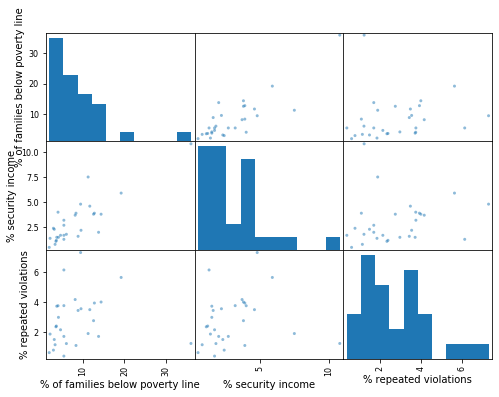

In [116]:
complete = pd.plotting.scatter_matrix(df_complete[['% of families below poverty line','% security income','% repeated violations']],figsize=(8,6))
complete = plt.gcf()


Nice! Not only can we see a clear connection between `% of families below poverty line`, `% security income`, and `% repeated violations`, there also seems to be positive correlations among these variables. Most notably, there is a strong correltion between `% of families below poverty line` & `% security income`. There does seem to be one to two notable outliers among all of the scatterplots – this is due to certain percentages being higher or lower than the average, a direct result from a specific zip code's economic demographic.

# DATA ANALYSIS

<font color=#949494>

### step seven: can we predict a restaurant's repeated health violations percentage from their respective zip code data?
</font>

Let's look at both `% of snap benefits` and `% security income`.

In [144]:
a1,b1 = np.polyfit(df_complete['% snap benefits'],df_complete['% repeated violations'], 1)


In [145]:
percentRange = np.arange(min(df_complete['% snap benefits']),
                         max(df_complete['% snap benefits']))
predRate = np.array(a1 * percentRange + b1)

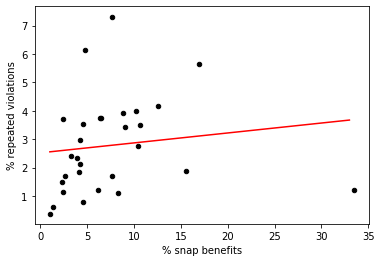

In [152]:
predictSnapRepeat = df_complete.plot.scatter(x='% snap benefits',
                                              y='% repeated violations',
                                              c = 'black')
plt.plot(np.arange(min(df_complete['% snap benefits']),
                   max(df_complete['% snap benefits'])),
                   predRate, color = 'red')
predictSnapRepeat = plt.gcf()

In [149]:
a2,b2 = np.polyfit(df_complete['% security income'],df_complete['% repeated violations'], 1)


In [153]:
securityRange = np.arange(min(df_complete['% security income']),
                         max(df_complete['% security income']))
securityRate = np.array(a1 * securityRange + b1)

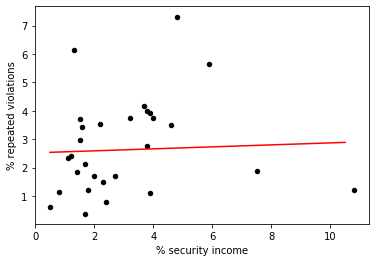

In [154]:
predictSecurityRepeat = df_complete.plot.scatter(x='% security income',
                                              y='% repeated violations',
                                              c = 'black')
plt.plot(np.arange(min(df_complete['% security income']),
                   max(df_complete['% security income'])),
                   securityRate, color = 'red')
predictSecurityRepeat = plt.gcf()

Hmm...not quite. It looks like these models are perform poorly on the `df_complete` dataset, which means that using `% snap benefits` or `% security income` are ineffective ways to predict `% repeated violations`. This makes sense, since snap benefits and security income do not often play a role in a restaurant's overall cleanliness. However, it is still good to confirm the predictive relationship, or lackthereof in this case, between these three variables.

# ETHICS & PRIVACY

The datasets provided to me have been erased of all personal information that could identify a certain person, group, or collective based in the United States. I did notice, however, that the provided zipcode dataset offered a column with `% nonwhites`. This may have skewed some data as the presence or absence of specific ethnicities could have affected the data collecting process (for example, some groups may not feel comfortable reporting their annual income). To handle this issue, I would provide a more in-depth breakdown of the ethnic groups that make up the nonwhites.

# CONCLUSION

In order to determine if there is a correlation between repeat health violations and the demographic information for their respective zip codes, I cross-referenced restaurant data with their inspection history by merging two datasets. I then calcuated the ratio of restaurants with repeat health violations to the total number of inspected restaurants within a given zip code, in order to further refine my data. While I was limited to the provided datasets, I was able to find a quantifiable, positively correlated connection between variables `% of families below poverty line`, `% security income`, and `% repeated violations`. Particularly, there is a strong correlation between `% of families below poverty line` & `% security income`.

For future research, we can look deeper into the various confounds that can account for this newfound correlation. Hopefully, by determining the underlying factors that affect a restaurant's repeated health violation, we can diminish the amount of strikes that each inspection can bring to certain restaurants, which can in turn improve the community's overall public health.